Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.
Даны значения роста в трех группах случайно выбранных спортсменов:

Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.

Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.

Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

Формулируем нулевую и альтернативную гипотезы.
Нулевая гипотеза :

H0: μ1 = μ2 = μ3

Альтернативная гипотеза состоит из нескольких частей.

H1.1: μ1 = μ2

H1.2: μ1 = μ3

H1.3: μ2 = μ3

устанавливаем уровень статистической значимости α = 0,05

в дисперсионном анализе используется критерий Фишера.

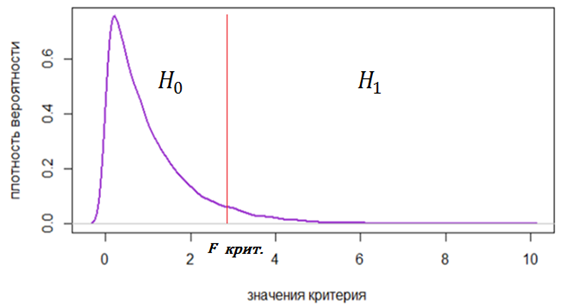

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


footballers = np.array([173, 175, 180, 178, 177, 185, 183, 182])
Hockeyplayers = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
Weightlifters = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

k = 3
n = 28

footballers_mean_1 = np.mean(footballers)
footballers_mean_1

179.125

In [2]:
Hockeyplayers_mean_1 = np.mean(Hockeyplayers)
Hockeyplayers_mean_1

178.66666666666666

In [3]:
Weightlifters_mean_1 = np.mean(Weightlifters)
Weightlifters_mean_1

172.72727272727272

In [13]:
total = np.concatenate([footballers, Hockeyplayers, Weightlifters])
total

array([173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177,
       172, 171, 184, 180, 172, 173, 169, 177, 166, 180, 178, 177, 172,
       166, 170])

In [14]:
mean_total = np.mean(total)
mean_total

176.46428571428572

Сумма квадратов отклонений наблюдений от общего среднего

In [15]:
np.sum((total - mean_total)**2)

830.9642857142854

Сумма квадратов отклонений средних групповых значений от общего среднего

In [16]:
S_f = np.sum((footballers_mean_1 - mean_total)**2) * 8 + np.sum((Hockeyplayers_mean_1 - mean_total)**2) * 9 + np.sum((Weightlifters_mean_1 - mean_total)**2) * 11
S_f

253.9074675324678

Остаточная сумма квадратов отклонений

In [20]:
S_ost = np.sum((footballers - footballers_mean_1)**2) + np.sum((Hockeyplayers - Hockeyplayers_mean_1)**2) + np.sum((Weightlifters - Weightlifters_mean_1)**2)
S_ost

577.0568181818182

Проверим равенство 

In [21]:
S_f + S_ost

830.964285714286

рассчитаем факторную дисперсию

In [22]:
D_f = S_f / (k - 1)
D_f

126.9537337662339

рассчитаем остаточную дисперсию

In [23]:
D_ost = S_ost / (n - k)
D_ost

23.08227272727273

рассчитаем наблюдаемый критерий Фишера

In [24]:
F_n = D_f / D_ost
F_n

5.500053450812598

воспользуемся готовой функцией для выполнения однофакторного дисперсионного анализа stats.f_oneway() и убедимся, что расчетный критерий Фишера имеет тоже самое значение, что и при ручных расчетах.

In [25]:
f = stats.f_oneway(footballers, Hockeyplayers, Weightlifters)
f

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

чтобы сделать вывод, о том, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов, найдем по таблице Фишера  табличное значение критерия F

этот критерий зависит от α  и степеней свободы. Уровень статистической значимости мы выбрали заранее α =  0.05 , а степени свободы рассчитаем 

In [30]:
k - 1, n - k  # степени свободы числителя и знаменателя

(2, 25)

Табличное значение Фишера равно 3,38

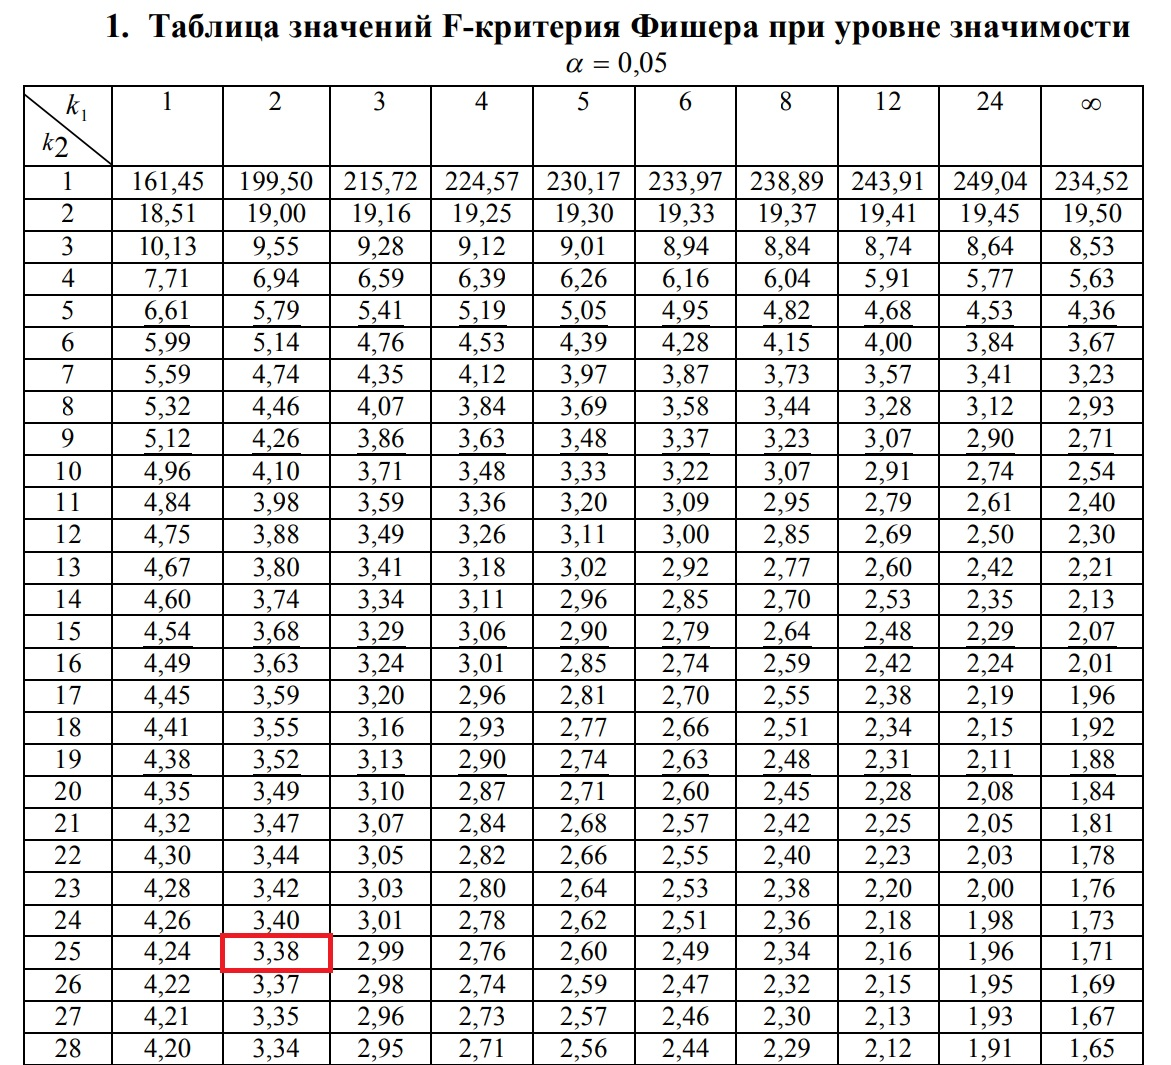

Расчетное значение 5,5 попадает в область принятия альтернативной гипотезы. Делаем вывод, что присутствуют различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

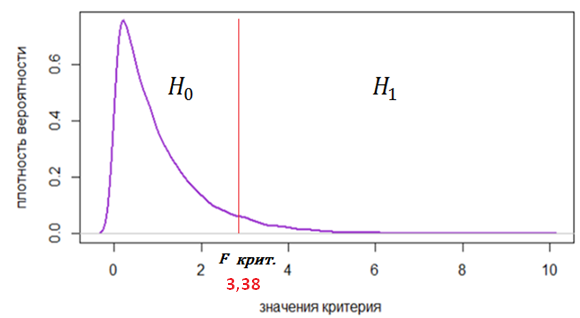

Post hoc test

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

df = pd.DataFrame({'score': [ 173, 175, 180, 178, 177, 185, 183, 182,
                              177, 179, 180, 188, 177, 172, 171, 184, 180, 
                              172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170],
                   'group': np.repeat(['footballers', 'Hockeyplayers', 'Weightlifters'], repeats=(8, 9, 11))})
tukey = pairwise_tukeyhsd(endog=df['score'], 
                            groups=df['group'],
                            alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
Hockeyplayers Weightlifters  -5.9394 0.0284 -11.3181 -0.5607   True
Hockeyplayers   footballers   0.4583  0.979  -5.3566  6.2732  False
Weightlifters   footballers   6.3977 0.0219   0.8372 11.9583   True
-------------------------------------------------------------------


Вывод:
по столбцу p-adj сравниваем значения с уровнем статистической значимости 0.05. Видно, что между хоккеистами и штангистами, а также штангистами и футбалистами обнаружены статистические различия.
По этим результатам дисперсионный анализ сообщил нам о статистически значимом различии роста среди взрослых футболистов, хоккеистов и штангистов. 